#### Packages

In [2]:
# useful packages
import numpy as np
import matplotlib.pyplot as plt
import cv2

from __future__ import print_function, division

from skimage.io import imread
from skimage.transform import radon, rescale

#### Basic U-shaped object generation
2D image, default dimenstion is 64 x 64 pixels
the object locate at the center of the image

(64, 64)


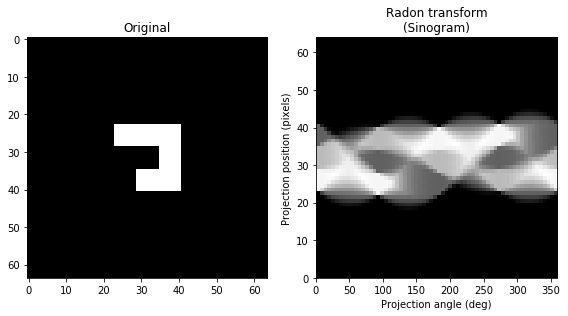

In [51]:
# translation matrix using homogeneous coordinates.
# Libary used: numpy
# inputs: x -- moving distance in x-axis
#         y -- moving distance in y-axis
# output: return the translation matrix
def translation_mat(x, y):
    mat = np.array([[1, 0, x],
                    [0, 1, y],
                    [0, 0, 1]])
    return mat

# conpute the centroid of a 2d object
# suppose the shape is [num_points, 2]
def center(object_coordinates):
    # num of points
    num = object_coordinates.shape[0]
    # sum all the coordinates
    coordinate_sum = np.sum(object_coordinates, axis=0)
    # first value is the sum of x, second value is the sum of y
    center = np.array([coordinate_sum / num, coordinate_sum / num])
    return center

# ================================================================
# main function
def u_shaped_object():
    # create a 64x64 image, U-shaped object in it
    # shape width is 10 pixels
    u_shape = np.zeros((64, 64))

    """
    Say "U" in the middle
    This u-shaped object constructed by 5 squares, each square is 10 x 10 pixels
    Create one square and do transformation, then we can get rest of the squares
    """
    # the initial square is it the top-left corner
    # 6x6= 36 points, 2D image, so 72 values
    # suppose: point 1 to 6 is the first row
    #               7 to 12 is the second. and so on...
    # using 3 columns because it's in homogeneous coordinates
    square = np.ones((36, 3))
    for i in range(36):
        # x-coordinate for point i
        square[i][0] = i % 6
        # x-coordinate for point i
        square[i][1] = i // 6
        # change the correspoding values in u-shaped object
        # u_shape[i % 6, i // 6] = 1
    
    # do translation
    # center square
    center_square = np.dot(translation_mat(29, 35), square.T).astype(int)
    for j in center_square[1]:
        for i in center_square[0]:
            u_shape[i, j] = 1
    
    "left side of the u-shaped object"
    # bottom left one = center square move 6 pixel left
    bottom_left_square = np.dot(translation_mat(-6, 0), center_square).astype(int)
    for j in bottom_left_square[1]:
        for i in bottom_left_square[0]:
            u_shape[i, j] = 1
    # upper left = bottom left one move 6 pixel up
    upper_left_square = np.dot(translation_mat(0, -6), bottom_left_square).astype(int)
    for j in upper_left_square[1]:
        for i in upper_left_square[0]:
            u_shape[i, j] = 1
    # one more step, longer than the other side
    upper_left_square_more = np.dot(translation_mat(0, -6), upper_left_square).astype(int)
    for j in upper_left_square_more[1]:
        for i in upper_left_square_more[0]:
            u_shape[i, j] = 1
    
    "right side of the u-shaped object"
    # bottom right = center square move 6 pixel right
    bottom_right_square = np.dot(translation_mat(6, 0), center_square).astype(int)
    for j in bottom_right_square[1]:
        for i in bottom_right_square[0]:
            u_shape[i, j] = 1
    # upper right = bottom right one move 6 pixel up
    upper_right_square = np.dot(translation_mat(0, -6), bottom_right_square).astype(int)
    for j in upper_right_square[1]:
        for i in upper_right_square[0]:
            u_shape[i, j] = 1
    # concatenate
    #shapes = np.concatenate((center_square, bottom_left_square, upper_left_square, bottom_right_square, upper_right_square), axis=1)
    shapes = np.concatenate((center_square, bottom_left_square, bottom_right_square), axis=1)
    # U-shape object
#     for j in shapes[1]:
#         for i in shapes[0]:
#             u_shape[i, j] = 1
    
    shapes = np.concatenate((upper_right_square, upper_left_square), axis=1)

    
    # U-shape object unsymmetric
#     for j in shapes[1]:
#         if j >= 20 and j < 30:
#             for i in shapes[0]:
#                 u_shape[i, j] = 1
    return u_shape

objectU = u_shaped_object()
#print (objectU.shape)
#plt.imshow(objectU, cmap='gray')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(objectU, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 360., max(objectU.shape), endpoint=False)
sinogram = radon(objectU, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 360, 0, sinogram.shape[0]), aspect='auto')

print (sinogram.shape)

fig.tight_layout()
plt.show()
    

#### Basic shape 2: thinner U shape
same size of the image: 64x64
Similarly, this u shape is constructed by several squares, the size of each square is 4x4
Length of the u shape: 4 squares
Width           : 3 squares

(64, 64)


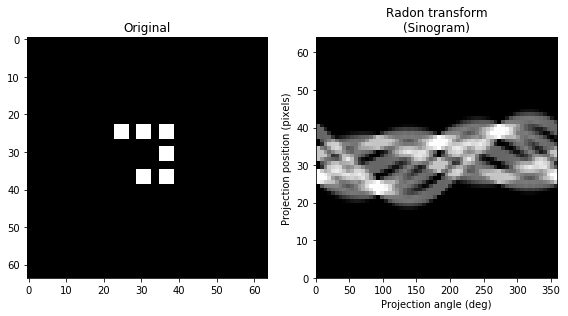

In [52]:
# main function
def disconnected_Ushaped_object():
    # create a 64x64 image, U-shaped object in it
    # shape width is 10 pixels
    u_shape = np.zeros((64, 64))

    """
    Say "U" in the middle
    This u-shaped object constructed by 5 squares, each square is 10 x 10 pixels
    Create one square and do transformation, then we can get rest of the squares
    """
    # the initial square is it the top-left corner
    # 6x6= 36 points, 2D image, so 72 values
    # suppose: point 1 to 6 is the first row
    #               7 to 12 is the second. and so on...
    # using 3 columns because it's in homogeneous coordinates
    square = np.ones((16, 3))
    for i in range(16):
        # x-coordinate for point i
        square[i][0] = i % 4
        # x-coordinate for point i
        square[i][1] = i // 4
        # change the correspoding values in u-shaped object
        # u_shape[i % 6, i // 6] = 1
    
    # do translation
    # center square
    center_square = np.dot(translation_mat(29, 35), square.T).astype(int)
    for j in center_square[1]:
        for i in center_square[0]:
            u_shape[i, j] = 1
    
    "left side of the u-shaped object"
    # bottom left one = center square move 6 pixel left
    bottom_left_square = np.dot(translation_mat(-6, 0), center_square).astype(int)
    for j in bottom_left_square[1]:
        for i in bottom_left_square[0]:
            u_shape[i, j] = 1
    # upper left = bottom left one move 6 pixel up
    upper_left_square = np.dot(translation_mat(0, -6), bottom_left_square).astype(int)
    for j in upper_left_square[1]:
        for i in upper_left_square[0]:
            u_shape[i, j] = 1
    # one more step, longer than the other side
    upper_left_square_more = np.dot(translation_mat(0, -6), upper_left_square).astype(int)
    for j in upper_left_square_more[1]:
        for i in upper_left_square_more[0]:
            u_shape[i, j] = 1
    
    "right side of the u-shaped object"
    # bottom right = center square move 6 pixel right
    bottom_right_square = np.dot(translation_mat(6, 0), center_square).astype(int)
    for j in bottom_right_square[1]:
        for i in bottom_right_square[0]:
            u_shape[i, j] = 1
    # upper right = bottom right one move 6 pixel up
    upper_right_square = np.dot(translation_mat(0, -6), bottom_right_square).astype(int)
    for j in upper_right_square[1]:
        for i in upper_right_square[0]:
            u_shape[i, j] = 1
    
    return u_shape

objectU = disconnected_Ushaped_object()
#print (objectU.shape)
#plt.imshow(objectU, cmap='gray')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(objectU, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 360., max(objectU.shape), endpoint=False)
sinogram = radon(objectU, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 360, 0, sinogram.shape[0]), aspect='auto')

print (sinogram.shape)

fig.tight_layout()
plt.show()
    

#### thinner u shape
this u shape is constructed by several squares, the size of each square is 4x4. Length of the u shape: 4 squares. Width : 3 squares

(64, 64)


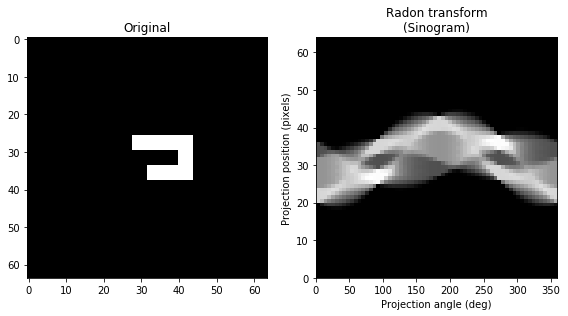

In [53]:
# main function
def thin_Ushaped_object():
    # create a 64x64 image, U-shaped object in it
    # shape width is 10 pixels
    u_shape = np.zeros((64, 64))

    """
    Say "U" in the middle
    This u-shaped object constructed by 5 squares, each square is 10 x 10 pixels
    Create one square and do transformation, then we can get rest of the squares
    """
    # the initial square is it the top-left corner
    # 6x6= 36 points, 2D image, so 72 values
    # suppose: point 1 to 6 is the first row
    #               7 to 12 is the second. and so on...
    # using 3 columns because it's in homogeneous coordinates
    square = np.ones((16, 3))
    for i in range(16):
        # x-coordinate for point i
        square[i][0] = i % 4
        # x-coordinate for point i
        square[i][1] = i // 4
        # change the correspoding values in u-shaped object
        # u_shape[i % 6, i // 6] = 1
    
    # do translation
    # center square
    center_square = np.dot(translation_mat(30, 40), square.T).astype(int)
    for j in center_square[1]:
        for i in center_square[0]:
            u_shape[i, j] = 1
    
    "left side of the u-shaped object"
    # bottom left one = center square move 6 pixel left
    bottom_left_square = np.dot(translation_mat(-4, 0), center_square).astype(int)
    for j in bottom_left_square[1]:
        for i in bottom_left_square[0]:
            u_shape[i, j] = 1
    # upper left = bottom left one move 6 pixel up
    upper_left_square = np.dot(translation_mat(0, -4), bottom_left_square).astype(int)
    for j in upper_left_square[1]:
        for i in upper_left_square[0]:
            u_shape[i, j] = 1
    # one more step, longer than the other side
    upper_left_square_more = np.dot(translation_mat(0, -4), upper_left_square).astype(int)
    for j in upper_left_square_more[1]:
        for i in upper_left_square_more[0]:
            u_shape[i, j] = 1
    # one more step, longer than the other side
    upper_left_square_more2 = np.dot(translation_mat(0, -4), upper_left_square_more).astype(int)
    for j in upper_left_square_more2[1]:
        for i in upper_left_square_more2[0]:
            u_shape[i, j] = 1
    
    "right side of the u-shaped object"
    # bottom right = center square move 6 pixel right
    bottom_right_square = np.dot(translation_mat(4, 0), center_square).astype(int)
    for j in bottom_right_square[1]:
        for i in bottom_right_square[0]:
            u_shape[i, j] = 1
    # upper right = bottom right one move 6 pixel up
    upper_right_square = np.dot(translation_mat(0, -4), bottom_right_square).astype(int)
    for j in upper_right_square[1]:
        for i in upper_right_square[0]:
            u_shape[i, j] = 1
    # upper right = bottom right one move 6 pixel up
    upper_right_square_more = np.dot(translation_mat(0, -4), upper_right_square).astype(int)
    for j in upper_right_square_more[1]:
        for i in upper_right_square_more[0]:
            u_shape[i, j] = 1
    
    return u_shape

objectU = thin_Ushaped_object()
#print (objectU.shape)
#plt.imshow(objectU, cmap='gray')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(objectU, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 360., max(objectU.shape), endpoint=False)
sinogram = radon(objectU, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 360, 0, sinogram.shape[0]), aspect='auto')

print (sinogram.shape)

fig.tight_layout()
plt.show()
    

#### V-shaped object

(64, 64)


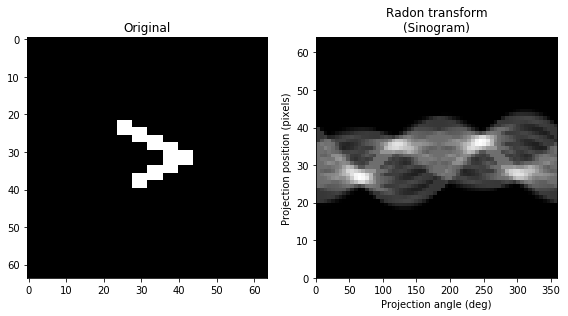

In [56]:
# main function
def v_shaped_object():
    # create a 64x64 image, U-shaped object in it
    # shape width is 10 pixels
    u_shape = np.zeros((64, 64))

    """
    Say "U" in the middle
    This u-shaped object constructed by 5 squares, each square is 10 x 10 pixels
    Create one square and do transformation, then we can get rest of the squares
    """
    # the initial square is it the top-left corner
    # 6x6= 36 points, 2D image, so 72 values
    # suppose: point 1 to 6 is the first row
    #               7 to 12 is the second. and so on...
    # using 3 columns because it's in homogeneous coordinates
    square = np.ones((16, 3))
    for i in range(16):
        # x-coordinate for point i
        square[i][0] = i % 4
        # x-coordinate for point i
        square[i][1] = i // 4
        # change the correspoding values in u-shaped object
        # u_shape[i % 6, i // 6] = 1
    
    # do translation
    # center square
    center_square = np.dot(translation_mat(30, 40), square.T).astype(int)
    for j in center_square[1]:
        for i in center_square[0]:
            u_shape[i, j] = 1
    
    "left side of the u-shaped object"
    # bottom left one = center square move 6 pixel left
    bottom_left_square = np.dot(translation_mat(-2, -4), center_square).astype(int)
    for j in bottom_left_square[1]:
        for i in bottom_left_square[0]:
            u_shape[i, j] = 1
    # upper left = bottom left one move 6 pixel up
    upper_left_square = np.dot(translation_mat(-2, -4), bottom_left_square).astype(int)
    for j in upper_left_square[1]:
        for i in upper_left_square[0]:
            u_shape[i, j] = 1
    # one more step, longer than the other side
    upper_left_square_more = np.dot(translation_mat(-2, -4), upper_left_square).astype(int)
    for j in upper_left_square_more[1]:
        for i in upper_left_square_more[0]:
            u_shape[i, j] = 1
    # one more step, longer than the other side
    upper_left_square_more2 = np.dot(translation_mat(-2, -4), upper_left_square_more).astype(int)
    for j in upper_left_square_more2[1]:
        for i in upper_left_square_more2[0]:
            u_shape[i, j] = 1
    
    "right side of the u-shaped object"
    # bottom right = center square move 6 pixel right
    bottom_right_square = np.dot(translation_mat(2, -4), center_square).astype(int)
    for j in bottom_right_square[1]:
        for i in bottom_right_square[0]:
            u_shape[i, j] = 1
    # upper right = bottom right one move 6 pixel up
    upper_right_square = np.dot(translation_mat(2, -4), bottom_right_square).astype(int)
    for j in upper_right_square[1]:
        for i in upper_right_square[0]:
            u_shape[i, j] = 1
    # upper right = bottom right one move 6 pixel up
    upper_right_square_more = np.dot(translation_mat(2, -4), upper_right_square).astype(int)
    for j in upper_right_square_more[1]:
        for i in upper_right_square_more[0]:
            u_shape[i, j] = 1
    
    return u_shape

objectU = v_shaped_object()
#print (objectU.shape)
#plt.imshow(objectU, cmap='gray')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(objectU, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 360., max(objectU.shape), endpoint=False)
sinogram = radon(objectU, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 360, 0, sinogram.shape[0]), aspect='auto')

print (sinogram.shape)

fig.tight_layout()
plt.show()
    

#### Functions to create more different images of U-shaped object

(64, 64)


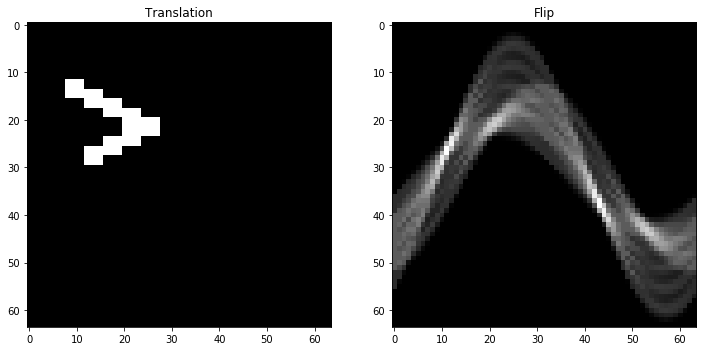

In [83]:
# Translation the object.
# Lib used: opencv, numpy
# input: image =========> an image contains the object
#        tx    =========> translation in x direction
#        ty    =========> translation in y direction
#
# output: return the image after translation
def trans_image(image, tx, ty):
    """
    Notes:
    The returned image will be displayed by matplot.
    Color order is different between opencv and matplot
    OpenCV: BRG, Matplot: RGB
    Need re-order before return if the image is colorful
    """
    # generate translation matrix
    trans_mat_homo = translation_mat(tx, ty)
    # opencv doesn't require the homogeneous coordinates
    trans_mat = trans_mat_homo[0:2, :].astype(dtype='float32')
    # get the size of the image
    rows, cols = image.shape
    # warping
    trans_img = cv2.warpAffine(image, trans_mat, (cols,rows))
    # re-order the image, so that it can be displayed correctly by matplot
    #b, r, g = cv2.split(trans_img)
    #trans_img = cv2.merge(r, g, b)
    # return, it is an np.ndarray
    return trans_img

objectU = v_shaped_object()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6.5))
image = trans_image(objectU, -16, -10)
ax1.set_title("Translation")
ax1.imshow(image, cmap=plt.cm.Greys_r)

flipped = cv2.flip(image, -1)
ax2.set_title("Flip")
sinogram = radon(image, theta=theta, circle=True)
sinogram = radon(flipped, theta=theta, circle=True)
ax2 = plt.imshow(sinogram, cmap='gray')
print (sinogram.shape)
plt.show()

#### Generate images, save them into file

In [99]:
"translation and flip"
def generate(object_img):
    # store generated images
    imageSet = []
    sinogramSet = []
    
    # theta used for radon transformation
    theta = np.linspace(0., 360., max(object_img.shape), endpoint=False)
    
    # translation: x from -21 to 21, y from -14 to 14, step = 2
    for x in range(-16, 16, 2):
        for y in range(-10, 10, 2):
            # translation image
            temp_trans_img = trans_image(object_img, x, y)
            imageSet.append(temp_trans_img.reshape(-1))
            # sinogram
            temp_sino = radon(temp_trans_img, theta=theta, circle=True)
            sinogramSet.append(temp_sino.reshape(-1))
            
            # flip horizontal
            temp_flip1_img = cv2.flip(temp_trans_img, 1)
            imageSet.append(temp_flip1_img.reshape(-1))
            # sinogram
            temp_sino = radon(temp_flip1_img, theta=theta, circle=True)
            sinogramSet.append(temp_sino.reshape(-1))
            
            # flip vertical
            temp_flip2_img = cv2.flip(temp_trans_img, 0)
            imageSet.append(temp_flip2_img.reshape(-1))
            temp_sino = radon(temp_flip2_img, theta=theta, circle=True)
            sinogramSet.append(temp_sino.reshape(-1))
            
            # flip horizontal and vertical
            temp_flip3_img = cv2.flip(temp_trans_img, -1)
            imageSet.append(temp_flip3_img.reshape(-1))
            temp_sino = radon(temp_flip3_img, theta=theta, circle=True)
            sinogramSet.append(temp_sino.reshape(-1))
            # end for loop
            
    # convert to np array
    imageSet = np.asarray(imageSet)
    sinogramSet = np.asarray(sinogramSet)
    
    return imageSet, sinogramSet

# store four basic shapes
four_shapes = []
# first one: u shape
temp_object = u_shaped_object()
four_shapes.append(temp_object)
# second one: disconnected u shape, thinner
temp_object = disconnected_Ushaped_object()
four_shapes.append(temp_object)
# third one: thin u shape, connected
temp_object = thin_Ushaped_object()
four_shapes.append(temp_object)
# forth one: v shape
temp_object = v_shaped_object()
four_shapes.append(temp_object)

# directory for saving files
img_file_path = "./image_data/real/"
sino_file_path = "./image_data/sinogram/"

for i in range(4):
    # generate the file name
    imageFileName = ("{}{}{}").format(img_file_path, "imageSet", i)
    sinoFileName = ("{}{}{}").format(sino_file_path, "sinogramSet", i)
    
    # generate the image set and the sinogram set
    imageSet, sinogramSet = generate(four_shapes[i])
    
    # save files
    np.save(imageFileName, imageSet)
    np.save(sinoFileName, sinogramSet)


<h4>Validation</h4>
<p>
<ol>
    <li>Read image from imageSet.npy file
    <li>Do radon transformation with the image in step 1
    <li>Read the corresponding sinogram from the sinogramSet.npy file
    <li>Plot thses two sinograms and see if they are the same
</ol>

(4096,)
(4096,)
(64, 64)


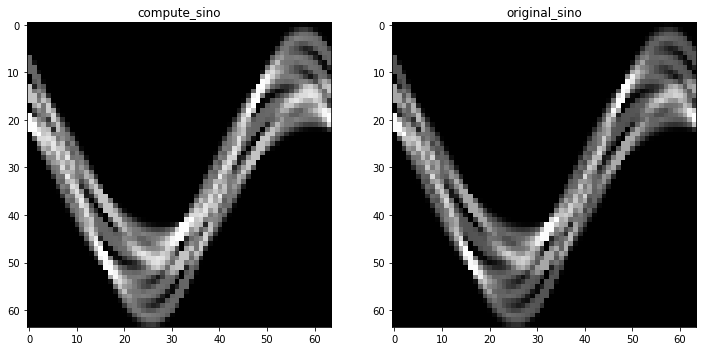

In [103]:
a = np.load("./image_data/real/imageSet1.npy")
b = np.load("./image_data/sinogram/sinogramSet1.npy")
print (a[0].shape)

temp_trans_img = a[0].reshape(64, 64)
theta = np.linspace(0., 360., max(temp_trans_img.shape), endpoint=False)
temp_sino = radon(temp_trans_img, theta=theta, circle=True)
print (a[0].shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6.5))

ax1.set_title("compute_sino")
ax1.imshow(temp_sino, cmap=plt.cm.Greys_r)

flipped = cv2.flip(image, -1)
ax2.set_title("original_sino")
sinogram = b[0].reshape(64, 64)
ax2 = plt.imshow(sinogram, cmap='gray')
print (sinogram.shape)
plt.show()

In [16]:
import os

img_file_path = "./image_data/real/"
sino_file_path = "./image_data/sinogram/"

total = np.array([]).reshape(0, 64*64)

for image in os.listdir(img_file_path):
    print (image)
    data = np.load(img_file_path+image)
    total = np.vstack([total, data])

print (total.shape)


imageSet0.npy
imageSet1.npy
imageSet2.npy
imageSet3.npy
(2560, 4096)


#### Generate image with only one dot in it (For pre-training)

one_dot_images size: (1600, 64, 64)
one_dot_sinogram size: (1600, 64, 64)


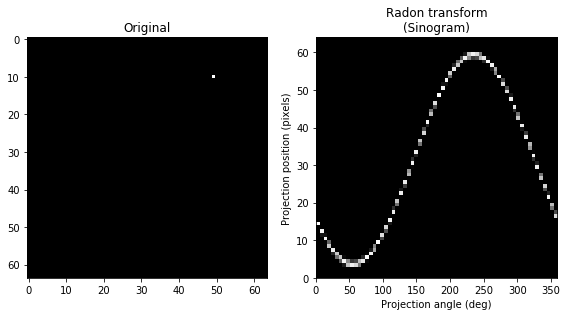

In [5]:
# One dot image, 64x64
def one_dot(x, y):
    image = np.zeros((64, 64))
    image[x, y] = 1
    
    return image

# generate different images
one_dot_images = []
for x in range(10, 50):
    for y in range(10, 50):
        one_dot_images.append(one_dot(x,y))

one_dot_images = np.asarray(one_dot_images)
print ("one_dot_images size: {}".format(one_dot_images.shape))

one_dot_sinogram = []
theta = np.linspace(0., 360., max(one_dot_images[1].shape), endpoint=False)
for i in range(one_dot_images.shape[0]):
    sinogram = radon(one_dot_images[i], theta=theta, circle=True)
    one_dot_sinogram.append(sinogram)
one_dot_sinogram = np.asarray(one_dot_sinogram)
print ("one_dot_sinogram size: {}".format(one_dot_sinogram.shape))

# directory for saving files
# img_file_path = "./image_data/pretrain_img/"
# sino_file_path = "./image_data/pretrain_sinogram/"
# np.save(img_file_path + "pretrain_imgSet", one_dot_images)
# np.save(sino_file_path + "pretrain_sinoSet", one_dot_sinogram)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(one_dot_images[39].reshape(64, 64), cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(one_dot_sinogram[39].reshape(64,64), cmap=plt.cm.Greys_r,
           extent=(0, 360, 0, one_dot_sinogram[39].reshape(64,64).shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

In [1]:
random_index = np.random.choice(one_dot_images.shape[0], size=100)
pretrain_features = np.array(one_dot_sinogram[random_index])
# directory for sinograms
sino_file_path = "./image_data/sinogram/"
# get the sinogram data
sino_data = read_data(sino_file_path, 64*64)
train_features = np.array(sino_data[random_index])
print (train_features.shape)

NameError: name 'np' is not defined

#### Neural Network (simple dense NN)
Say each hidden layers has 1024 x 1024

In [ ]:
# build the neural network and train and test for the reconstruction
# Deep Neural Network

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import tempfile
import argparse
import sys
import os

STEPS = 5000

"""data handling"""
# read data from files
def read_data(path, size):
    # store data
    final_data = np.array([]).reshape(0, size)
    
    # read from each file
    for file in os.listdir(path):
        single_file_data = np.load(path + file)
        # concatenate with previous data
        final_data = np.vstack([final_data, single_file_data])
    
    return final_data

# # training data
# def input_train(data, label):
#     # original dataset
#     dataset = tf.data.Dataset.from_tensor_slices((data, label))
    
#     # some transformation
#     dataset = dataset.shuffle(buffer_size=10000)
#     dataset = dataset.batch(20)
#     dataset = dataset.repeat()
#     iterator = dataset.make_one_shot_iterator()
    
#     # `features` is a dictionary in which each value is a batch of values for
#     # that feature; `labels` is a batch of labels.    
#     features, labels = iterator.get_next()
#     return features, labels

# # test data
# def input_test(data, label):
#     # original dataset
#     dataset = tf.data.Dataset.from_tensor_slices((data, label))
    
#     # some transformation
#     dataset = dataset.shuffle(buffer_size=100)
#     dataset = dataset.batch(20)
#     dataset = dataset.repeat()
#     iterator = dataset.make_one_shot_iterator()
    
#     # `features` is a dictionary in which each value is a batch of values for
#     # that feature; `labels` is a batch of labels.    
#     features, labels = iterator.get_next()
#     return features, labels

# weight
def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# bias (intercept)
def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# layers: convolution layer 2D
def conv2d(x, W):
    """conv2d returns a 2d convolution layer with full stride."""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# layer: max_pooling layer 2D
def max_pool_2x2(x):
    """max_pool_2x2 downsamples a feature map by 2X."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

"""build the network"""
def simple_cnn(input_images, image_size):
    
    with tf.name_scope('reshape'):
        x_image = tf.reshape(input_images, [-1, 64, 64, 1])
    
    # First convolutional layer - maps one grayscale image to 32 feature maps.
    with tf.name_scope('conv1'):
        W_conv1 = weight_variable([5, 5, 1, 32])
        b_conv1 = bias_variable([32])
        h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    
    # Pooling layer - downsamples by 2X.
    with tf.name_scope('pool1'):
        h_pool1 = max_pool_2x2(h_conv1)
    
    # Second convolutional layer -- maps 32 feature maps to 64.
    with tf.name_scope('conv2'):
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    
    # Second pooling layer.
    with tf.name_scope('pool2'):
        h_pool2 = max_pool_2x2(h_conv2)
    
    # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
    # is down to 7x7x64 feature maps -- maps this to 1024 features.
    with tf.name_scope('fc1'):
        W_fc1 = weight_variable([16 * 16 * 64, 1024])
        b_fc1 = bias_variable([1024])
        
        h_pool2_flat = tf.reshape(h_pool2, [-1, 16 * 16 * 64])
        h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    # Dropout - controls the complexity of the model, prevents co-adaptation of
    # features.
    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    # fully connected
    with tf.name_scope('fc2'):
        W_fc = weight_variable([1024, image_size])
        b_fc = bias_variable([image_size])
        
        y_cnn = tf.matmul(h_fc1_drop, W_fc) + b_fc
    
    return y_cnn, keep_prob

# simple dnn
def simple_dnn(input_images, image_size):    
    # num of units
    hidden_units = 10000
    
    # fully connected layer1 (hidden layer 1)
#     with tf.name_scope('fc1'):
#         W_fc1 = weight_variable([image_size, hidden_units])
#         b_fc1 = bias_variable([hidden_units])
        
#         h_fc1 = tf.nn.relu(tf.matmul(input_images, W_fc1) + b_fc1)
    with tf.device('device:GPU:0'):
        h_fc1 = tf.layers.dense(inputs=input_images, units=hidden_units, activation=tf.nn.relu)
        h_fc2 = tf.layers.dense(inputs=h_fc1, units=hidden_units, activation=tf.nn.relu)
        h_fc3 = tf.layers.dense(inputs=h_fc2, units=hidden_units, activation=tf.nn.relu)
        h_fc4 = tf.layers.dense(inputs=h_fc3, units=hidden_units, activation=tf.nn.relu)
        h_fc5 = tf.layers.dense(inputs=h_fc4, units=hidden_units, activation=tf.nn.relu)
    
    with tf.device('device:GPU:1'):
        h_fc6 = tf.layers.dense(inputs=h_fc5, units=hidden_units, activation=tf.nn.relu)
        h_fc7 = tf.layers.dense(inputs=h_fc6, units=hidden_units, activation=tf.nn.relu)
        h_fc8 = tf.layers.dense(inputs=h_fc7, units=hidden_units, activation=tf.nn.relu)
        h_fc9 = tf.layers.dense(inputs=h_fc8, units=hidden_units, activation=tf.nn.relu)
        h_fc10 = tf.layers.dense(inputs=h_fc9, units=hidden_units, activation=tf.nn.relu)
    
    # Dropout - controls the complexity of the model, prevents co-adaptation of
    # features.
    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        h_fcFinial_drop = tf.nn.dropout(h_fc10, keep_prob)
    
    # fully connected to produce the result
    with tf.name_scope('fc_final'):
        W_fc = weight_variable([hidden_units, image_size])
        b_fc = bias_variable([image_size])
        
        y_dnn = tf.matmul(h_fcFinial_drop, W_fc) + b_fc
    
    return y_dnn, keep_prob

# main
def main(_):
    """image size"""
    image_size = 64 * 64
    
    """sinogram size"""
    sino_size = 64 * 64
    
    """read pretrain data"""
    # directory for images
    pretrain_img = "./image_data/pretrain_img/pretrain_imgSet.npy"
    pretrain_sino = "./image_data/pretrain_sinogram/pretrain_sinoSet.npy"
    # get the image data
    one_dot_images = np.load(pretrain_img)
    one_dot_sinogram = np.load(pretrain_sino)
#     print ("one_dot_images shape: {}".format(one_dot_images.shape))
#     print ("one_dot_sinogram shape: {}".format(one_dot_sinogram.shape))
        
    # make sure they have the same number
    assert one_dot_images.shape[0] == one_dot_sinogram.shape[0]
    
    """read data from imageSetx.npy and sinogramSet.npy"""
    # directory for images
    img_file_path = "./image_data/real/"
    # get the image data
    image_data = read_data(img_file_path, image_size)
    
    # directory for sinograms
    sino_file_path = "./image_data/sinogram/"
    # get the sinogram data
    sino_data = read_data(sino_file_path, sino_size)
    
    # make sure they have the same number
    assert image_data.shape[0] == sino_data.shape[0]
        
    # placeholder for input and output
    x = tf.placeholder(tf.float32, [None, image_size])
    y_ = tf.placeholder(tf.float32, [None, image_size])
    
    # run dnn
    y_cnn, keep_prob = simple_dnn(x, image_size)
    
    # define loss funtion
    with tf.name_scope('loss'):
        squared_delta = tf.squared_difference(y_cnn, y_)
        loss = tf.reduce_sum(squared_delta)
    
    # define optimizer function
    with tf.name_scope('adam_optimizer'):
        #optimizer = tf.train.GradientDescentOptimizer(0.001)
        train_step = tf.train.AdamOptimizer(0.001).minimize(loss)
    
    # define accuracy function
#     with tf.name_scope('accuracy'):
#         pass
    accuracy = loss
    
    # graph_location
    graph_location = tempfile.mkdtemp()
    print('Saving graph to: %s' % graph_location)
    train_writer = tf.summary.FileWriter(graph_location)
    train_writer.add_graph(tf.get_default_graph())
    
    # train
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(STEPS):
            random_index = np.random.choice(one_dot_images.shape[0], size=100)
            pretrain_features = np.array(one_dot_sinogram[random_index]).reshape(100, -1)
            pretrain_labels = np.array(one_dot_images[random_index]).reshape(100, -1)
            if i % 1000 == 0:
                print ("Pretraining: step {}".format(i))
            train_step.run(feed_dict={x: pretrain_features, y_: pretrain_labels, keep_prob: 0.5})
            
        recon_list = []
        image_index = []
        for i in range(STEPS * 2):
            #test_input, test_labels = input_test(sino_data, image_data)
            random_index = np.random.choice(image_data.shape[0], size=100)
            train_features = np.array(sino_data[random_index])
            train_labels = np.array(image_data[random_index])
            if i % 100 == 0:
                error, recon_img = sess.run([loss, y_cnn],
                                            feed_dict={x: train_features, y_: train_labels, keep_prob: 1.0})
                #recon_list.append(recon_img)
                #image_index.append(random_index)
                print ("step {}, training loss {}".format(i, error))
            train_step.run(feed_dict={x: train_features, y_: train_labels, keep_prob: 0.5})
        
        # training is done, start testing
        random_index = np.random.choice(image_data.shape[0], size=100)
        test_features = np.array(sino_data[random_index])
        test_labels = np.array(image_data[random_index])
        test_error, test_recon_img = sess.run([loss, y_cnn],
                                              feed_dict={x: test_features, y_: test_labels, keep_prob: 1.0})
        np.save("test_recon_img2", np.asarray(test_recon_img))
        np.save("test_image_index2", np.asarray(random_index))

# run
if __name__ == '__main__':
    main(_)
    print ("End")


(100, 4096)
(4096,)
(100,)
1023


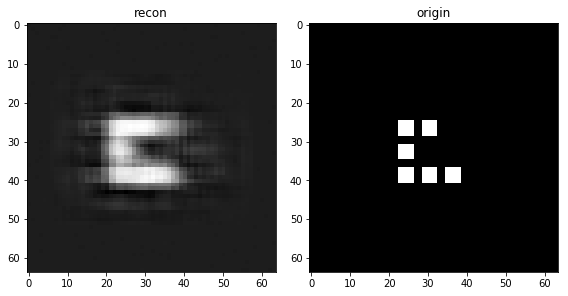

In [5]:
recon_list = np.load("./test_recon_img1.npy")
image_index = np.load("./test_image_index.npy")

# directory for images
img_file_path = "./image_data/real/"
image_size = 64 * 64
image_data = read_data(img_file_path, image_size)

recon_img = recon_list[99]
origin_index = image_index[99]

print (recon_list.shape)
print (recon_img.shape)
print (image_index.shape)
print (origin_index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("recon")
ax1.imshow(recon_img.reshape(64, 64), cmap=plt.cm.Greys_r)

ax2.set_title("origin")
ax2.imshow(image_data[origin_index].reshape(64, 64), cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()


(200, 100, 4096)
(4096,)


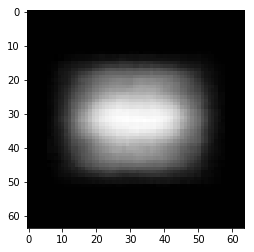

In [2]:
recon_list = np.load("./recon_list1.npy")
print (recon_list.shape)
print (recon_list[1, 1].shape)
imgplot = plt.imshow(recon_list[199, 99].reshape([64, 64]), cmap=plt.cm.Greys_r)

(200, 100, 4096)
(4096,)


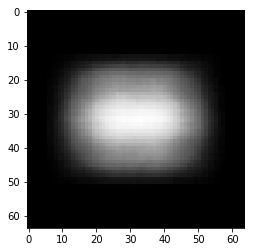

In [7]:
recon_list = np.load("./recon_list1.npy")
print (recon_list.shape)
print (recon_list[1, 1].shape)
imgplot = plt.imshow(recon_list[199, 99].reshape([64, 64]), cmap=plt.cm.Greys_r)

In [8]:
with open ('./output.txt', 'w') as outputFile:
    print ("testing", file=outputFile)